# Logistic Regression
____________________________________________________________
Table of Contents 

1. Import libraries 
2. Load Rosetta Stone data 
  1. Explore data
3. Add binary predictor columns 
4. Logistic Regression Model on Lifetime Subscriber
  1. Accuracy score
  2. Confusion matrix 
5. Create a correlation coefficient data frame 
  1. Add an odds column
  2. GGplot of the coefficients
6. Logistic Regression Model on Auto Renew Subscriber
  1. Accuracy score
  2. Confusion matrix 
7. Create a correlation coefficient data frame 
  1. Add an odds column
  2. GGplots
____________________________________________________________

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.0 Import Libraries

In [3]:
import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# 2.0 Load Rosetta Stone cleaned data
> Rosetta Stone loading function



In [4]:
def load_rosetta_stone_data():
    """
    This function loads the rosetta stone data
    """

    import pandas as pd
    rosetta_stone_data = pd.read_csv("https://github.com/connoralydon/rosetta_stone_final/raw/main/data/rosetta_stone_clean.csv")

    rosetta_stone_data["language"] = rosetta_stone_data["language"].astype("category")
    rosetta_stone_data["subscription_event_type"] = rosetta_stone_data["subscription_event_type"].astype("category")
    rosetta_stone_data["purchase_store"] = rosetta_stone_data["purchase_store"].astype("category")
    rosetta_stone_data["country"] = rosetta_stone_data["country"].astype("category")
    rosetta_stone_data["user_type"] = rosetta_stone_data["user_type"].astype("category")

    rosetta_stone_data["subscription_start_date"] = pd.to_datetime(rosetta_stone_data["subscription_start_date"])

    rosetta_stone_data["demo_user"] = rosetta_stone_data["demo_user"].astype("bool")
    rosetta_stone_data["free_trial_user"] = rosetta_stone_data["free_trial_user"].astype("bool")
    rosetta_stone_data["auto_renew"] = rosetta_stone_data["auto_renew"].astype("bool")
    rosetta_stone_data["email_subscriber"] = rosetta_stone_data["email_subscriber"].astype("bool")
    rosetta_stone_data["push_notifications"] = rosetta_stone_data["push_notifications"].astype("bool")
    rosetta_stone_data["subscription_type_limited"] = rosetta_stone_data["subscription_type_limited"].astype("category")
    rosetta_stone_data["subscription_type_lifetime"] = rosetta_stone_data["subscription_type_lifetime"].astype("category")

    return rosetta_stone_data

rosetta_stone_data = load_rosetta_stone_data()

# 2.1 Data exploartion

> column names, stat summary, and ggplots










In [5]:
rosetta_stone_data.columns

Index(['Unnamed: 0', 'language', 'subscription_event_type', 'purchase_store',
       'subscription_start_date', 'demo_user', 'free_trial_user', 'auto_renew',
       'country', 'user_type', 'lead_platform', 'email_subscriber',
       'push_notifications', 'send_count', 'unique_open_count',
       'unique_click_count', 'purchase_amount_usd', 'subscription_length_days',
       'subscription_type_lifetime', 'subscription_type_limited',
       'total_app_interactions', 'launch_app_interactions',
       'purchase_amount_usd_imputed'],
      dtype='object')

In [6]:
rosetta_stone_data.head()

,Unnamed: 0,language,subscription_event_type,purchase_store,subscription_start_date,demo_user,free_trial_user,auto_renew,country,user_type,...,send_count,unique_open_count,unique_click_count,purchase_amount_usd,subscription_length_days,subscription_type_lifetime,subscription_type_limited,total_app_interactions,launch_app_interactions,purchase_amount_usd_imputed
0,0,POR,INITIAL_PURCHASE,App,2018-12-28,True,False,False,US/Canada,Consumer,...,63.0,6.0,0.0,NaN,182,0,1,14.0,12.0,10.064357
1,1,EBR,INITIAL_PURCHASE,Web,2019-11-28,False,False,False,Other,Consumer,...,4.0,1.0,0.0,39.0,92,0,1,80.0,27.0,39.000000
2,2,ESP,INITIAL_PURCHASE,Web,2018-12-31,False,False,False,US/Canada,Consumer,...,1.0,0.0,0.0,0.0,365,0,1,78.0,39.0,0.000000
3,3,KOR,INITIAL_PURCHASE,App,2019-11-07,True,False,False,US/Canada,Consumer,...,14.0,0.0,0.0,NaN,92,0,1,38.0,15.0,13.975346
4,4,ENG,INITIAL_PURCHASE,App,2019-08-13,False,False,False,US/Canada,Consumer,...,80.0,5.0,1.0,NaN,92,0,1,152.0,63.0,6.399365


In [7]:
rosetta_stone_data.describe()

,Unnamed: 0,send_count,unique_open_count,unique_click_count,purchase_amount_usd,subscription_length_days,total_app_interactions,launch_app_interactions,purchase_amount_usd_imputed
count,40102.000000,40102.000000,40102.000000,40102.000000,25424.000000,40102.000000,40102.000000,40102.000000,40102.000000
mean,20050.500000,22.976684,2.761259,0.257468,70.502468,4918.460426,19.700938,7.020473,63.621055
std,11576.594584,51.367900,11.205423,0.967859,77.836453,10561.101848,47.628892,15.726941,67.925914
min,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000
25%,10025.250000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,13.604652
50%,20050.500000,5.000000,0.000000,0.000000,36.852428,282.000000,4.000000,2.000000,39.000000
75%,30075.750000,17.000000,1.000000,0.000000,119.000000,419.000000,20.000000,8.000000,79.000000
max,40101.000000,4370.000000,196.000000,44.000000,412.970000,29312.000000,1168.000000,296.000000,412.970000


In [8]:
# subset the original df to compute the average amount paid per subscriber group
df = rosetta_stone_data.loc[:, ['subscription_type_lifetime', 'purchase_amount_usd_imputed']]
df.head()

,subscription_type_lifetime,purchase_amount_usd_imputed
0,0,10.064357
1,0,39.000000
2,0,0.000000
3,0,13.975346
4,0,6.399365


On average, Lifetime Subscribers spend the most per subscription 

In [9]:
# output the average cost per group (0 = limited, 1 = lifetime) 
df.groupby(['subscription_type_lifetime']).mean()

,purchase_amount_usd_imputed
subscription_type_lifetime,
0,40.209295
1,183.655961


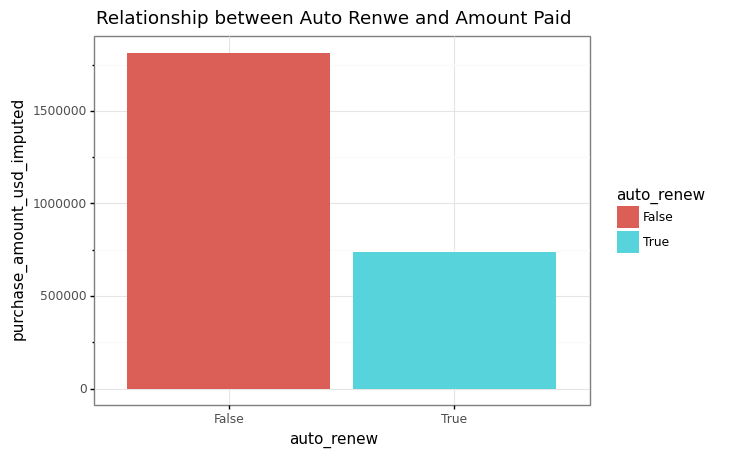

<ggplot: (8750018272801)>

In [35]:
ggplot(rosetta_stone_data, aes(x='auto_renew', y='purchase_amount_usd_imputed', fill='auto_renew')) + geom_bar(stat='identity') + theme_bw() + ggtitle("Relationship between Auto Renwe and Amount Paid")

# this makes sense as lifetime sibscribers (who spend the most on average) mostly 
# have their auto renews off as they do not need to renew their lifetime purchase 

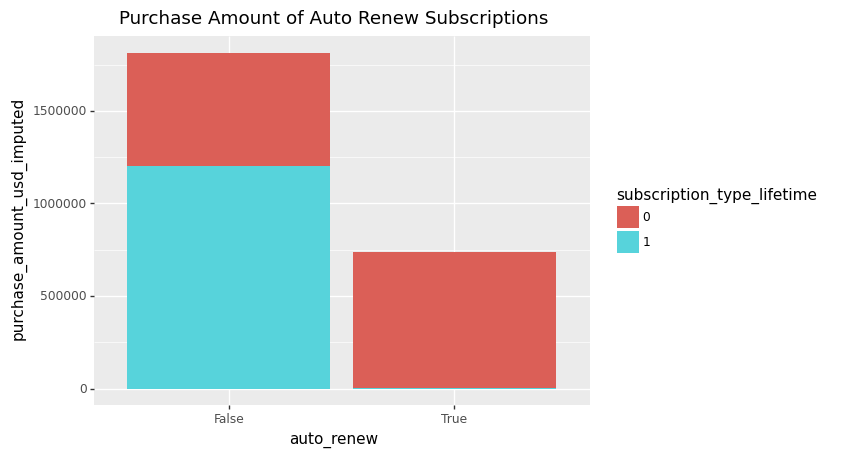

<ggplot: (8750018110893)>

In [37]:
ggplot(rosetta_stone_data, aes(x="auto_renew", y="purchase_amount_usd_imputed", fill='subscription_type_lifetime')) + geom_bar(stat='identity') + ggtitle("Purchase Amount of Auto Renew Subscriptions")

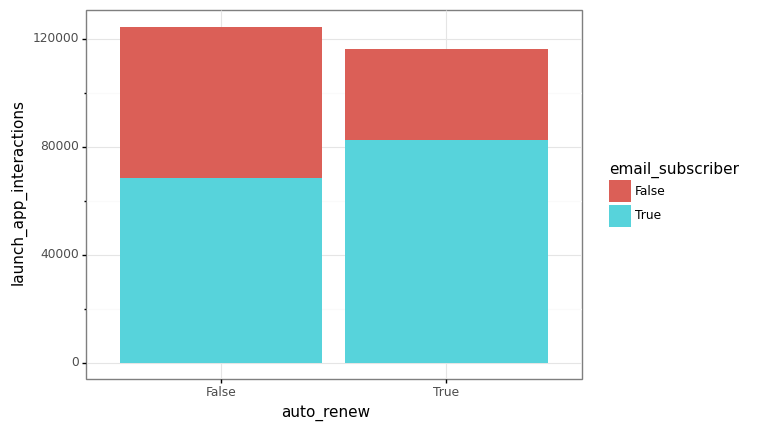

<ggplot: (8755100902893)>

In [ ]:
ggplot(rosetta_stone_data2, aes(x='auto_renew', y='launch_app_interactions', fill='email_subscriber')) + geom_bar(stat='identity') + theme_bw()

# 3.0 Adding binary predictor columns

In [ ]:
rosetta_stone_data['subscription_event_type_bin'] = np.where(rosetta_stone_data['subscription_event_type']=='RENEWAL', 1, 0)
rosetta_stone_data['purchase_store_binary'] = np.where(rosetta_stone_data['purchase_store']=='App', 1, 0)
rosetta_stone_data['user_type_binary'] = np.where(rosetta_stone_data['user_type']=='Consumer', 1, 0)

# encode the multiple levels of lead_platform_type 
ord_enc = OrdinalEncoder()

rosetta_stone_data["lead_platform_type"] = ord_enc.fit_transform(rosetta_stone_data[["lead_platform"]])

# output the new column levels 
rosetta_stone_data[["lead_platform", "lead_platform_type"]].tail(20)

,lead_platform,lead_platform_type
40082,Unknown,1.0
40083,Unknown,1.0
40084,Unknown,1.0
40085,Unknown,1.0
40086,Unknown,1.0
40087,Unknown,1.0
40088,Unknown,1.0
40089,Unknown,1.0
40090,Unknown,1.0
40091,Unknown,1.0


# 4.0 Logistic Regression Model


> Predictor column == 'subscription_type_lifetime' 



In [ ]:
pred = ["subscription_event_type_bin", "purchase_store_binary",
        "user_type_binary", "lead_platform_type", "demo_user",
        "free_trial_user", "auto_renew",
       "send_count", "unique_open_count", "unique_click_count",
       "total_app_interactions", "launch_app_interactions", 'purchase_amount_usd_imputed']

# 80/20 train test split on the data
X_train, X_test, y_train, y_test = train_test_split(rosetta_stone_data[pred], rosetta_stone_data["subscription_type_lifetime"], test_size=0.2)

zscore = StandardScaler()

# fit the training set 
zscore.fit(X_train)

Xz_train = zscore.transform(X_train)
Xz_test = zscore.transform(X_test)

In [ ]:
myLogit = LogisticRegression(penalty = "none") 

In [ ]:
myLogit.fit(Xz_train,y_train)

LogisticRegression(penalty='none')

Create test set predictions

In [ ]:
# predict test 
predictedVals = myLogit.predict(Xz_test)
print(predictedVals)

[0 1 1 ... 1 0 0]


# 4.1 Model accuracy score

In [ ]:
# get accuracy 
accuracy_score(y_test,predictedVals)

0.9793043261438723

# 4.2 Confusion matrix

In [ ]:
# confusion matrix
confusion_matrix(y_test,predictedVals)

array([[6624,   67],
       [  99, 1231]])

# 5.0 Correlation coefficient data frame

In [ ]:
coef = pd.DataFrame({"Coefs": myLogit.coef_[0],
                     "Names": pred})
coef = coef.append({"Coefs": myLogit.intercept_[0],
                    "Names": "intercept"}, ignore_index = True)
# print 
coef

,Coefs,Names
0,-8.285867,subscription_event_type_bin
1,0.245138,purchase_store_binary
2,0.455682,user_type_binary
3,-0.202858,lead_platform_type
4,-0.369988,demo_user
5,-0.595565,free_trial_user
6,-4.328631,auto_renew
7,-0.284085,send_count
8,0.110759,unique_open_count
9,0.164990,unique_click_count


# 5.1 Add an *odds* column 
> Interpret the likelihood of event Y (Lifetime Subscription): 

> if > 1 then event Y is more likely to occur, 
> if < 1 then event Y is less likey to occur.









In [ ]:
# log odds coefs
coef["Odds Coefs"] = np.exp(coef["Coefs"])
coef

,Coefs,Names,Odds Coefs
0,-8.285867,subscription_event_type_bin,0.000252
1,0.245138,purchase_store_binary,1.277797
2,0.455682,user_type_binary,1.577249
3,-0.202858,lead_platform_type,0.816394
4,-0.369988,demo_user,0.690742
5,-0.595565,free_trial_user,0.551251
6,-4.328631,auto_renew,0.013186
7,-0.284085,send_count,0.752702
8,0.110759,unique_open_count,1.117126
9,0.164990,unique_click_count,1.179381


# 5.2 Log odds ggplot

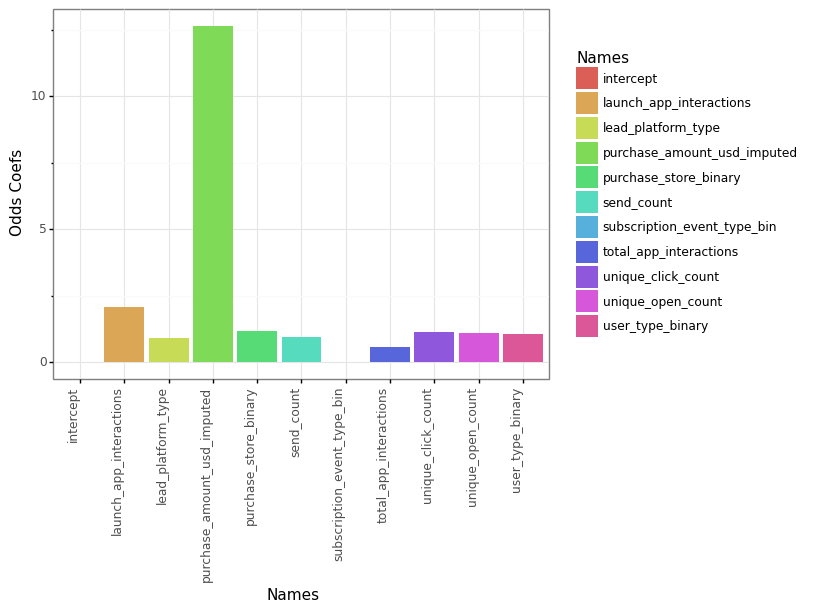

<ggplot: (8771328867629)>

In [ ]:
# gglot of the coefs in log odds
ggplot(coef, aes(x='Names',y='Odds Coefs', fill='Names')) + geom_bar(stat='identity') + theme_bw() + theme(axis_text_x  = element_text(angle = 90, hjust = 1))

# 6.0 Logistic Regression on Auto Renew

In [18]:
# new df without lifetime subscribers because they do not have their renews on
rosetta_stone_data2 = rosetta_stone_data[rosetta_stone_data.subscription_type_lifetime != 1]

In [19]:
pred2 = ['total_app_interactions', 
            'launch_app_interactions', 
            'subscription_length_days', 
            'purchase_amount_usd_imputed', 
            'unique_open_count', 
            'unique_click_count']

# 80/20 train test split on the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(rosetta_stone_data2[pred2], rosetta_stone_data2["auto_renew"], test_size=0.2)

zscore2 = StandardScaler()

# fit the training set 
zscore2.fit(X_train2)

Xz_train2 = zscore2.transform(X_train2)
Xz_test2 = zscore2.transform(X_test2)

In [20]:
myLogit2 = LogisticRegression(penalty = "none") 

In [21]:
myLogit2.fit(Xz_train2,y_train2)

LogisticRegression(penalty='none')

In [22]:
# predict test 
predictedVals2 = myLogit2.predict(Xz_test2)
print(predictedVals2)

[False  True False ... False  True False]


# 6.1 Accuracy Score

In [23]:
# acc score
accuracy_score(y_test2,predictedVals2)

0.6387067938021455

# 6.2 Confusion Matrix

In [24]:
# confusion matrix
confusion_matrix(y_test2,predictedVals2)

array([[3054,  765],
       [1660, 1233]])

# 7.0 Correlation coefficients data frame for logit2

In [25]:
coef2 = pd.DataFrame({"Coefs": myLogit2.coef_[0],
                     "Names": pred2})
coef2 = coef2.append({"Coefs": myLogit2.intercept_[0],
                    "Names": "intercept"}, ignore_index = True)
# print 
coef2

,Coefs,Names
0,0.521283,total_app_interactions
1,-0.434571,launch_app_interactions
2,0.424657,subscription_length_days
3,0.455983,purchase_amount_usd_imputed
4,-0.163451,unique_open_count
5,0.024330,unique_click_count
6,-0.312157,intercept


# 7.1 Add an *odds* column
> Likelihood interpretation


we see that the coefs in predicting a renewal customer are similar to the coefs used to predict a lifetime subscriber



In [26]:
# log odds coefs
coef2["Odds Coefs"] = np.exp(coef2["Coefs"])
coef2

,Coefs,Names,Odds Coefs
0,0.521283,total_app_interactions,1.684187
1,-0.434571,launch_app_interactions,0.647543
2,0.424657,subscription_length_days,1.529066
3,0.455983,purchase_amount_usd_imputed,1.577724
4,-0.163451,unique_open_count,0.849208
5,0.024330,unique_click_count,1.024629
6,-0.312157,intercept,0.731867


# 7.2 GGplots

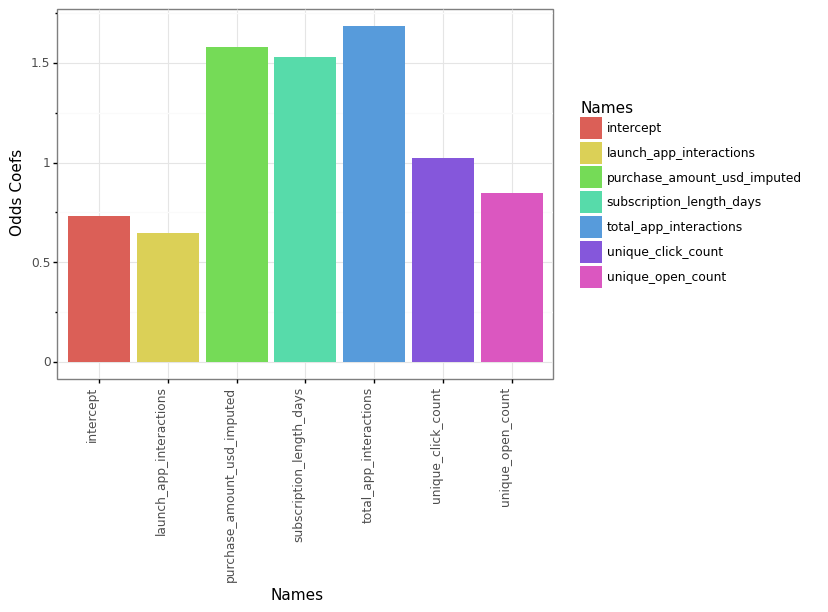

<ggplot: (8750018438425)>

In [27]:
# plot to vizualize the coefs 
ggplot(coef2, aes(x='Names', y='Odds Coefs', fill='Names')) + geom_bar(stat='identity') + theme_bw() + theme(axis_text_x  = element_text(angle = 90, hjust = 1))

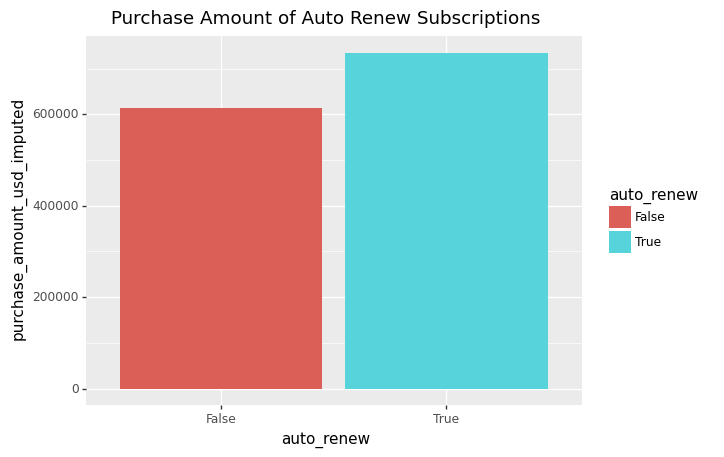

<ggplot: (8750013209869)>

In [38]:
ggplot(rosetta_stone_data2, aes(x="auto_renew", y="purchase_amount_usd_imputed", fill='auto_renew')) + geom_bar(stat='identity') + ggtitle("Purchase Amount of Auto Renew Subscriptions")

# this ggplot uses a dataframe that does not include the lifetime subs.
# because they have their auto renews off,
# therefore, this ggplot tells us that the rest of the population who have auto renews on pay more than those who don't